In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# 1. CREATE OWN DATASET using DataFrame (Academic Performance Dataset)
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Amit', 'Bhavna', 'Chetan', 'Divya', 'Esha', 'Faizan', 'Gauri', 'Harsh', 'Isha', 'Jay'],
    'Math_Score': [88, 92, np.nan, 45, 76, 85, 91, 130, 55, 60],   # 130 is an outlier
    'English_Score': [78, 82, 69, np.nan, 88, 75, 90, 85, 79, 82],
    'Science_Score': [85, 89, 92, 43, np.nan, 77, 86, 84, 110, 60], # 110 is an outlier
    'Attendance': [92, 88, 90, 85, 75, np.nan, 95, 98, 70, 85]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
   Student_ID    Name  Math_Score  English_Score  Science_Score  Attendance
0         101    Amit        88.0           78.0           85.0        92.0
1         102  Bhavna        92.0           82.0           89.0        88.0
2         103  Chetan         NaN           69.0           92.0        90.0
3         104   Divya        45.0            NaN           43.0        85.0
4         105    Esha        76.0           88.0            NaN        75.0
5         106  Faizan        85.0           75.0           77.0         NaN
6         107   Gauri        91.0           90.0           86.0        95.0
7         108   Harsh       130.0           85.0           84.0        98.0
8         109    Isha        55.0           79.0          110.0        70.0
9         110     Jay        60.0           82.0           60.0        85.0


In [2]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
# For numerical columns: fill with mean
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
df['English_Score'].fillna(df['English_Score'].mean(), inplace=True)
df['Science_Score'].fillna(df['Science_Score'].mean(), inplace=True)
df['Attendance'].fillna(df['Attendance'].mean(), inplace=True)

print("\nDataset After Handling Missing Values:")
print(df)



Missing Values:
Student_ID       0
Name             0
Math_Score       1
English_Score    1
Science_Score    1
Attendance       1
dtype: int64

Dataset After Handling Missing Values:
   Student_ID    Name  Math_Score  English_Score  Science_Score  Attendance
0         101    Amit   88.000000      78.000000      85.000000   92.000000
1         102  Bhavna   92.000000      82.000000      89.000000   88.000000
2         103  Chetan   80.222222      69.000000      92.000000   90.000000
3         104   Divya   45.000000      80.888889      43.000000   85.000000
4         105    Esha   76.000000      88.000000      80.666667   75.000000
5         106  Faizan   85.000000      75.000000      77.000000   86.444444
6         107   Gauri   91.000000      90.000000      86.000000   95.000000
7         108   Harsh  130.000000      85.000000      84.000000   98.000000
8         109    Isha   55.000000      79.000000     110.000000   70.000000
9         110     Jay   60.000000      82.000000      60

C:\Users\hp\AppData\Local\Temp\ipykernel_11208\4096288168.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11208\4096288168.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


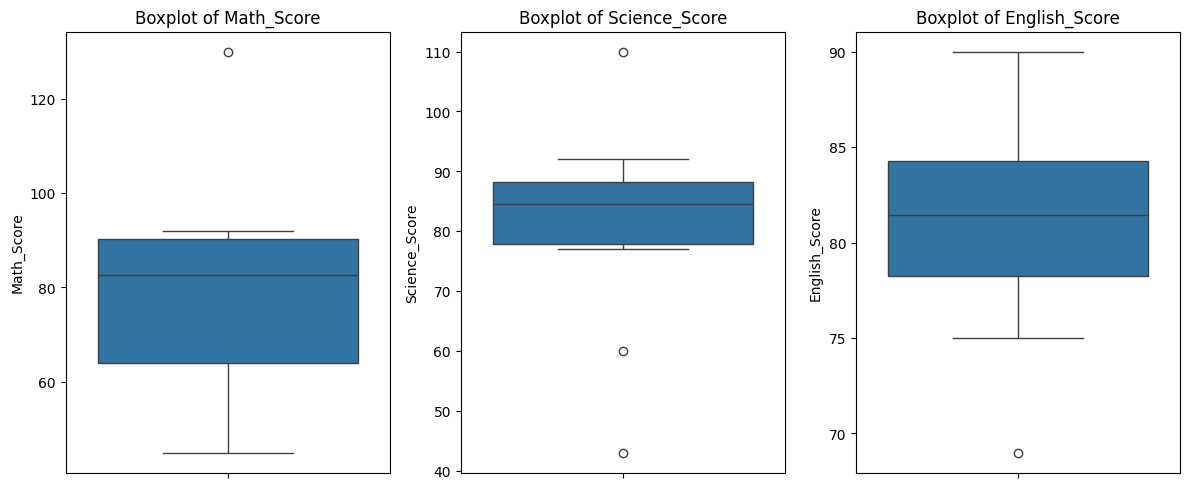


Dataset After Handling Outliers:
   Student_ID    Name  Math_Score  English_Score  Science_Score  Attendance
0         101    Amit   88.000000      78.000000      85.000000   92.000000
1         102  Bhavna   92.000000      82.000000      89.000000   88.000000
2         103  Chetan   80.222222      69.000000      92.000000   90.000000
3         104   Divya   45.000000      80.888889      43.000000   85.000000
4         105    Esha   76.000000      88.000000      80.666667   75.000000
5         106  Faizan   85.000000      75.000000      77.000000   86.444444
6         107   Gauri   91.000000      90.000000      86.000000   95.000000
7         108   Harsh   82.611111      85.000000      84.000000   98.000000
8         109    Isha   55.000000      79.000000      84.500000   70.000000
9         110     Jay   60.000000      82.000000      60.000000   85.000000


In [3]:
# Detect outliers using boxplot
plt.figure(figsize=(12, 5))
for i, column in enumerate(['Math_Score', 'Science_Score' ,'English_Score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
for column in ['Math_Score', 'Science_Score','English_Score']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, df[column].median(), df[column])
    
print("\nDataset After Handling Outliers:")
print(df)



Skewness before transformation (Attendance): -0.7910747949537472
Skewness after transformation (Attendance): -0.12756495138646592


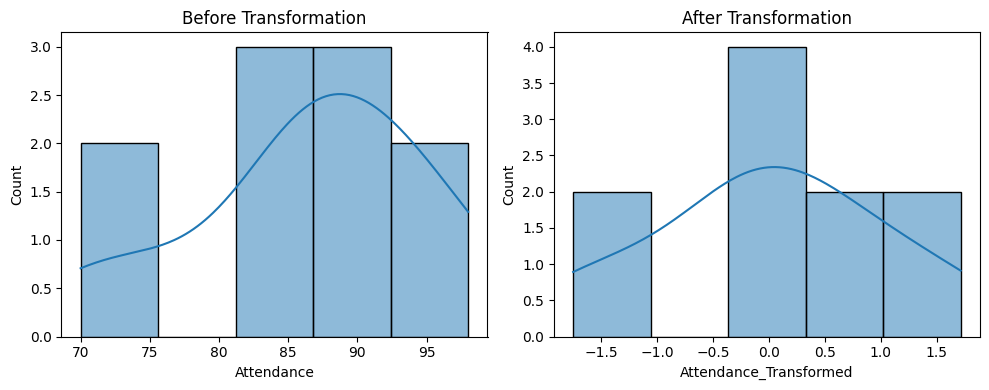

In [7]:
# Check skewness before transformation
print("\nSkewness before transformation (Attendance):", df['Attendance'].skew())

# Apply transformation to decrease skewness
pt = PowerTransformer(method='yeo-johnson')
df['Attendance_Transformed'] = pt.fit_transform(df[['Attendance']])

# Check skewness after transformation
print("Skewness after transformation (Attendance):", pd.Series(df['Attendance_Transformed']).skew())

# Visualize before and after transformation
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Attendance'], kde=True)
plt.title("Before Transformation")

plt.subplot(1, 2, 2)
sns.histplot(df['Attendance_Transformed'], kde=True)
plt.title("After Transformation")

plt.tight_layout()
plt.show()


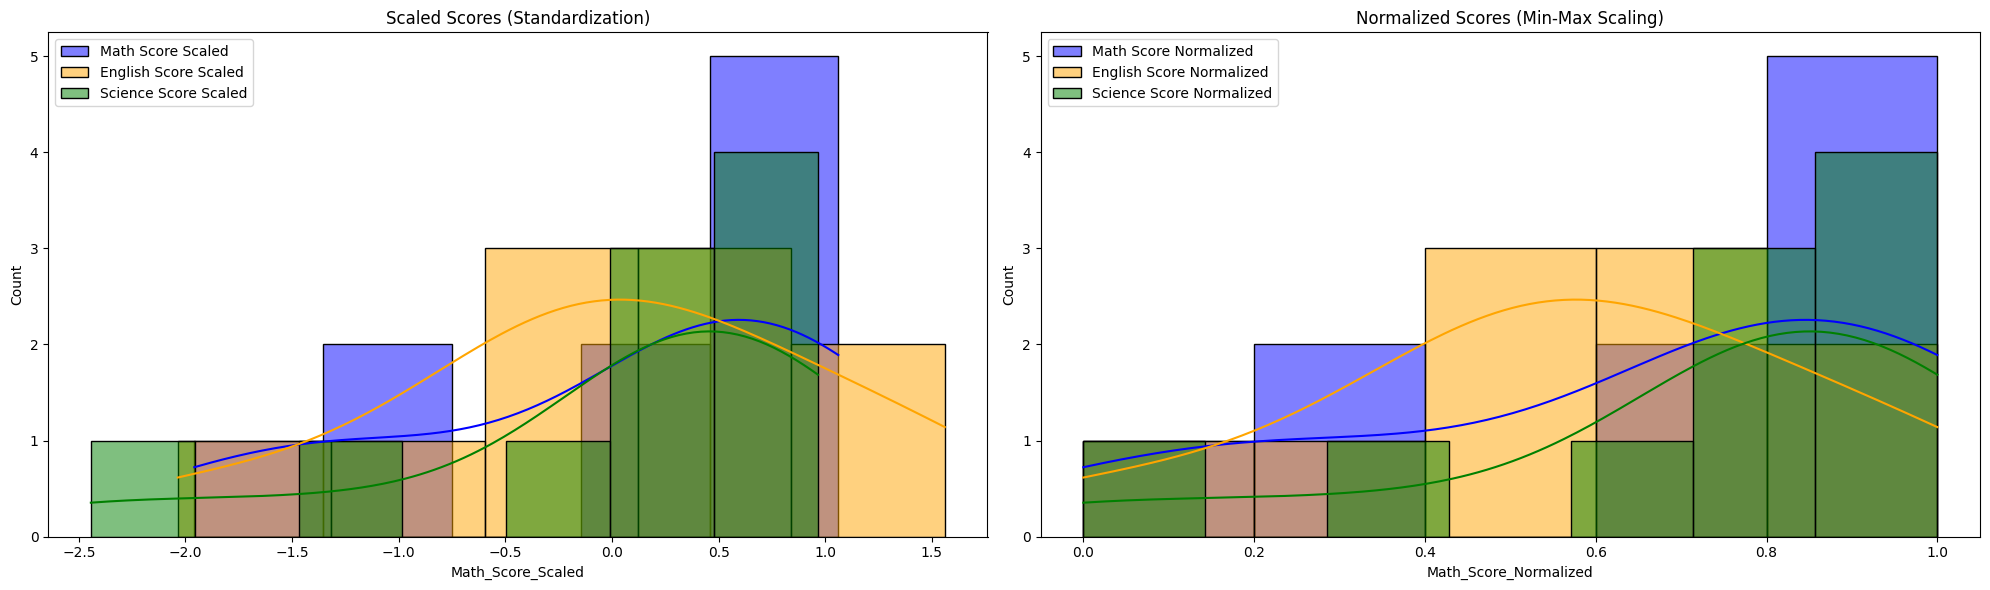


Final Dataset with Transformations, Scaling, and Normalization:
   Student_ID    Name  Math_Score  Math_Score_Transformed  Math_Score_Scaled  \
0         101    Amit   88.000000                4.488636           0.804126   
1         102  Bhavna   92.000000                4.532599           1.061104   
2         103  Chetan   80.222222                4.397189           0.304447   
3         104   Divya   45.000000                3.828641          -1.958384   
4         105    Esha   76.000000                4.343805           0.033193   
5         106  Faizan   85.000000                4.454347           0.611393   
6         107   Gauri   91.000000                4.521789           0.996859   
7         108   Harsh   82.611111                4.426176           0.457920   
8         109    Isha   55.000000                4.025352          -1.315940   
9         110     Jay   60.000000                4.110874          -0.994718   

   Math_Score_Normalized  English_Score  English_Score

In [59]:
# Step 1: Scaling and Normalization on Math_Score, English_Score, Science_Score

# Scaling (Standardization) - Z-score
scaler = StandardScaler()
df[['Math_Score_Scaled', 'English_Score_Scaled', 'Science_Score_Scaled']] = scaler.fit_transform(
    df[['Math_Score', 'English_Score', 'Science_Score']]
)

# Normalization (Min-Max Scaling)
normalizer = MinMaxScaler()
df[['Math_Score_Normalized', 'English_Score_Normalized', 'Science_Score_Normalized']] = normalizer.fit_transform(
    df[['Math_Score', 'English_Score', 'Science_Score']]
)

# Step 2: Visualize Scaling and Normalization
plt.figure(figsize=(20, 6))

# Plot for scaled values
plt.subplot(1, 2, 1)
sns.histplot(df['Math_Score_Scaled'], kde=True, color='blue', label='Math Score Scaled')
sns.histplot(df['English_Score_Scaled'], kde=True, color='orange', label='English Score Scaled')
sns.histplot(df['Science_Score_Scaled'], kde=True, color='green', label='Science Score Scaled')
plt.title("Scaled Scores (Standardization)")
plt.legend()

# Plot for normalized values
plt.subplot(1, 2, 2)
sns.histplot(df['Math_Score_Normalized'], kde=True, color='blue', label='Math Score Normalized')
sns.histplot(df['English_Score_Normalized'], kde=True, color='orange', label='English Score Normalized')
sns.histplot(df['Science_Score_Normalized'], kde=True, color='green', label='Science Score Normalized')
plt.title("Normalized Scores (Min-Max Scaling)")
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Display the final dataset with transformed, scaled, and normalized values
print("\nFinal Dataset with Transformations, Scaling, and Normalization:")
print(df[['Student_ID', 'Name', 'Math_Score', 'Math_Score_Transformed', 'Math_Score_Scaled', 'Math_Score_Normalized',
          'English_Score', 'English_Score_Scaled', 'English_Score_Normalized',
          'Science_Score', 'Science_Score_Scaled', 'Science_Score_Normalized']])